<a href="https://colab.research.google.com/github/stephenbeckr/numerical-analysis-class/blob/master/Demos/Ch4_FiniteDifferences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First exploration of finite-difference approximations to derivatives

- Task 1: try the simple forward differences formula to approximate the derivative of $f(x)=\sin(x)$. The formula is:
$$f'(x) \approx \frac{ f(x+h)-f(x) }{h}$$
Try this for a range of stepsizes $h$. Can we make the approximation (aka "truncation") error arbitrarily small?

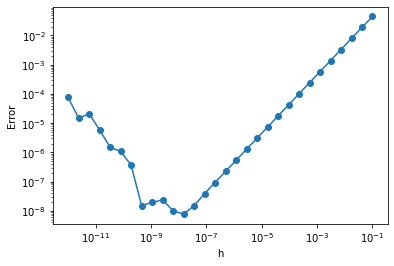

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Approximate the derivative of sin(x)
f   = lambda x : np.sin(x)
trueDerivative = lambda x : np.cos(x)

def twoPointForwardDifferences( f, x, h ):
  """ The simplest, plain vanilla finite difference approx"""
  return ( f(x+h) - f(x) )/h

# Pick some point x at which we want the derivative
x   = 2.
df      = trueDerivative(x)
twoPointF= lambda h : twoPointForwardDifferences( f, x, h)

# Pick stepsizes h
hList   = np.logspace(-1,-12,30)

# Plot
plt.loglog( hList, np.abs( df - twoPointF(hList) ), 'o-', label="2 Pt Forward Diff" );
plt.xlabel("h");
plt.ylabel("Error");

## Getting fancier: adding in other methods
- Task 2: try other finite difference methods (e.g, 3 point forward differences; 3 point centered differences; 5 point centered differences)

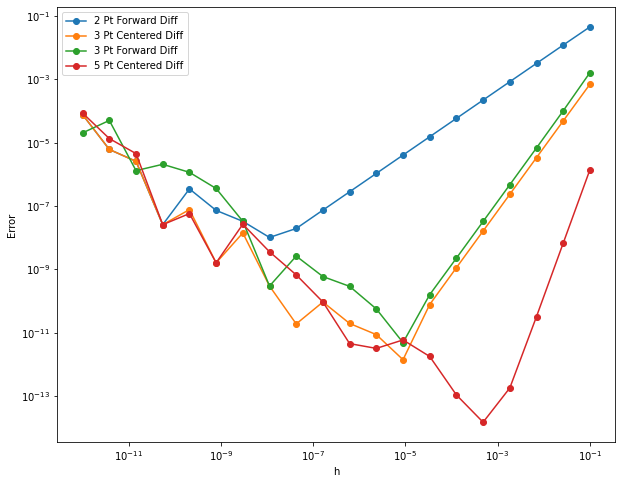

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Approximate the derivative of sin(x)
f   = lambda x : np.sin(x)
trueDerivative = lambda x : np.cos(x)

def twoPointForwardDifferences( f, x, h ):
  """ The simplest, plain vanilla finite difference approx"""
  return ( f(x+h) - f(x) )/h
def threePointForwardDifferences( f, x, h):
  """Eq. (4.4) in the Burden and Faires book"""
  return (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)
def threePointCenteredDifferences( f, x, h ):
  """ Book calls it 3 points, since it sort of includes f(x) """
  return ( f(x+h) - f(x-h) )/(2*h)
def fivePointCenteredDifferences( f, x, h ):
  """ Eq. (4.6) in Burden and Faires book """
  return ( f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h) )/(12*h)

# Pick some point x at which we want the derivative
x   = 2.
df      = trueDerivative(x)
twoPointF= lambda h : twoPointForwardDifferences( f, x, h)
threePointC= lambda h : threePointCenteredDifferences( f, x, h)
threePointF= lambda h : threePointForwardDifferences( f, x, h)
fivePointC= lambda h : fivePointCenteredDifferences( f, x, h)

# Pick stepsizes h
hList   = np.logspace(-1,-12,20)

# Plot
plt.figure(figsize=(10,8)) 
plt.loglog( hList, np.abs( df - twoPointF(hList) ), 'o-', label="2 Pt Forward Diff" );
plt.loglog( hList, np.abs( df - threePointC(hList) ), 'o-', label="3 Pt Centered Diff" );
plt.loglog( hList, np.abs( df - threePointF(hList) ), 'o-', label="3 Pt Forward Diff" );
plt.loglog( hList, np.abs( df - fivePointC(hList) ), 'o-', label="5 Pt Centered Diff" )
plt.legend();
plt.xlabel("h");
plt.ylabel("Error");

## Can we estimate how low the error can be?
It's a trade off between truncation error (low $h$ is good), and roundoff error (low $h$ is bad)
- Task 3: can we predict how low each method gets? Assume error looks like
$$\epsilon/h + h^k$$ where $k$ is the order, and use `sympy` to minimize this (e.g., differentiate it and set it equal to 0).  You may want to declare $\epsilon$ as a symbol like:  `e = sym.symbols('\epsilon',positive=True)`

In [113]:
import sympy as sym
from sympy import init_printing
init_printing()

h = sym.symbols('h')
e = sym.symbols('\epsilon',positive=True)
g = e/h + h
d = sym.diff( g,  h)
d
h0 = list( sym.solveset( d, h, domain=sym.S.Reals) )[0]
print("Order 1, (optimal h, value-at-optimal)")
h0, g.subs(h,h0)

Order 1, (optimal h, value-at-optimal)


In [114]:
g = e/h + h**2
d = sym.diff( g,  h)
h0 = list( sym.solveset( d, h, domain=sym.S.Reals) )[0]
print("Order 2")
h0, g.subs(h,h0)

Order 2


In [115]:
g = e/h + h**3
d = sym.diff( g,  h)
h0 = list( sym.solveset( d, h, domain=sym.S.Reals) )[0]
print("Order 3")
h0, g.subs(h,h0)

Order 3


In [117]:
g = e/h + h**4
d = sym.diff( g,  h)
h0 = list( sym.solveset( d, h, domain=sym.S.Reals) )[0]
print("Order 4")
h0, g.subs(h,h0)

Order 4


### And put these in the plot
- 2 pt forward diff is $O(h)$
- 3 pt forward diff is $O(h^2)$
- 3 pt centered diff is $O(h^2)$
- 5 pt centered diff is $O(h^4)$

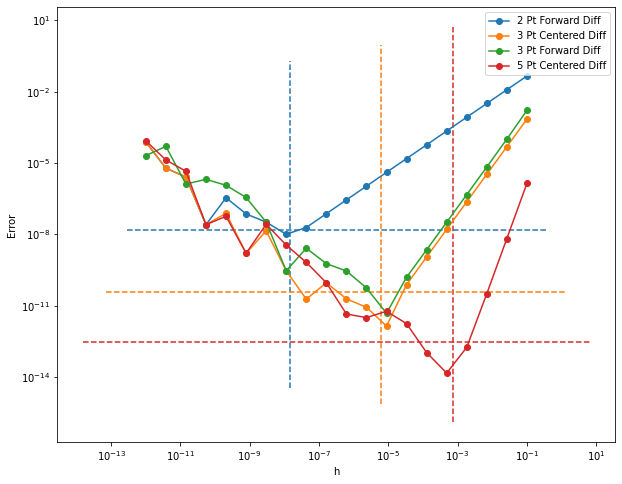

In [119]:
# So add to the plot
plt.figure(figsize=(10,8)) 
plt.loglog( hList, np.abs( df - twoPointF(hList) ), 'o-', label="2 Pt Forward Diff" );
plt.loglog( hList, np.abs( df - threePointC(hList) ), 'o-', label="3 Pt Centered Diff" );
plt.loglog( hList, np.abs( df - threePointF(hList) ), 'o-', label="3 Pt Forward Diff" );
plt.loglog( hList, np.abs( df - fivePointC(hList) ), 'o-', label="5 Pt Centered Diff" )
plt.legend();
plt.xlabel("h");
plt.ylabel("Error");

# And can we predict the values of h which gives us the smallest amount?
eps = np.finfo(float).eps
eps**(1/2)
eps**(1/4)
plt.vlines( eps**(1/2), *plt.gca().get_ylim() ,linestyles='--',colors="C0");
plt.vlines( eps**(1/3), *plt.gca().get_ylim() ,linestyles='--',colors="C1");
plt.vlines( eps**(1/5), *plt.gca().get_ylim() ,linestyles='--',colors="C3");

plt.hlines( eps**(1/2), *plt.gca().get_xlim() ,linestyles='--',colors="C0");
plt.hlines( eps**(2/3), *plt.gca().get_xlim() ,linestyles='--',colors="C1");
plt.hlines( eps**(4/5), *plt.gca().get_xlim() ,linestyles='--',colors="C3");